In [ ]:
!git clone https://github.com/deepanrajm/machine_learning.git
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from pandas import read_csv

Cloning into 'machine_learning'...
remote: Enumerating objects: 73082, done.
remote: Counting objects: 100% (3052/3052), done.
remote: Compressing objects: 100% (2855/2855), done.
remote: Total 73082 (delta 209), reused 3029 (delta 190), pack-reused 70030
Receiving objects: 100% (73082/73082), 126.34 MiB | 17.39 MiB/s, done.
Resolving deltas: 100% (211/211), done.
Updating files: 100% (5867/5867), done.


In [ ]:
sns.set()
dataframe = read_csv("machine_learning/Classification/iris.csv")
dataframe.info()
dataframe.describe()
dataframe.head()
dataset = dataframe.values
data = dataset[:,0:4].astype(float)

model = DBSCAN(eps=0.5, min_samples=5)
model.fit(data)
labels = model.labels_
print(labels)
num_clusters = len(set(labels))
unique_labels = set(labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   Variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.1 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2

<ipython-input-25-d548e2e5448e>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)


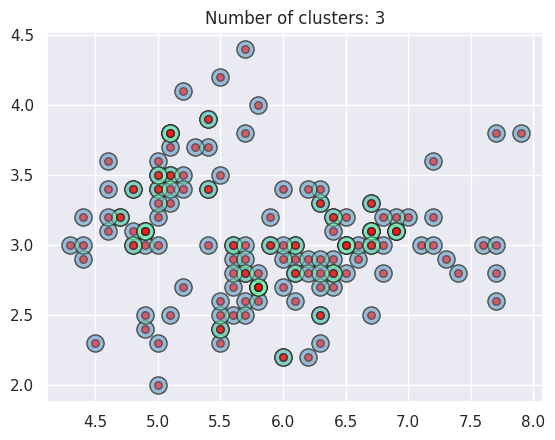

In [ ]:
fig, ax = plt.subplots()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
# print(colors)
for cluster_label, color in zip(unique_labels, colors):

    size = 150
    if cluster_label == -1:
        color = 'red'
        size = 30

    x_coords = data[:, 0]
    y_coords = data[:, 1]
    ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   Variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


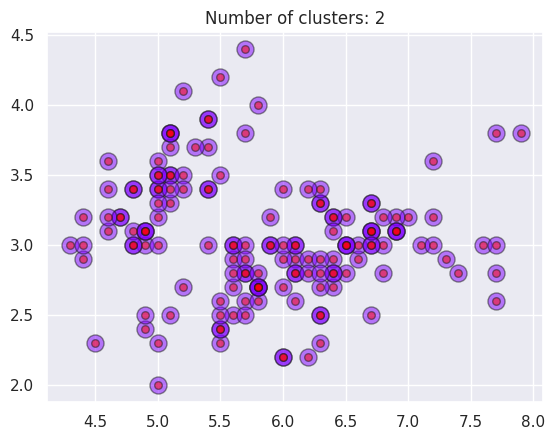

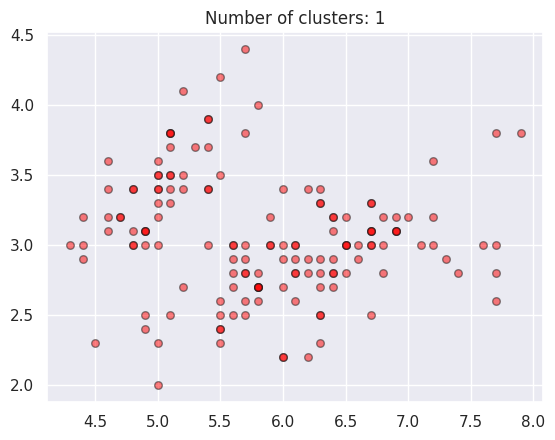

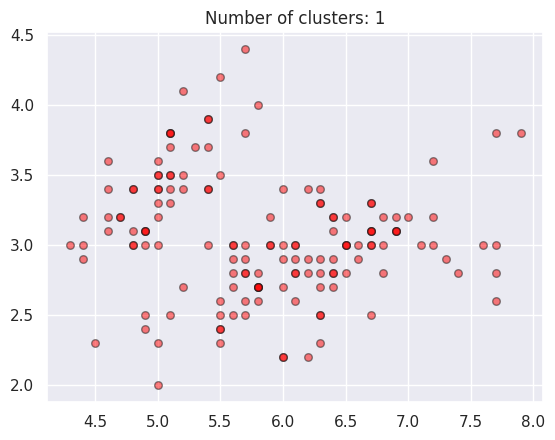

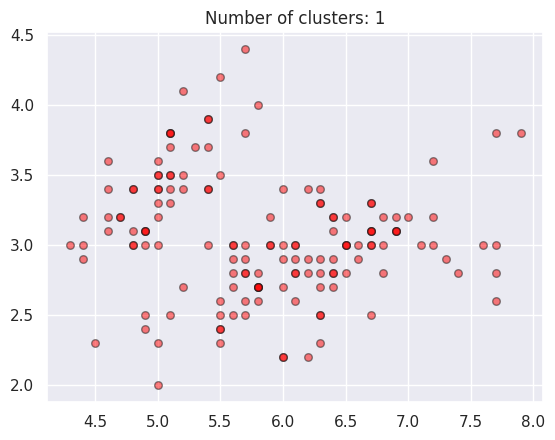

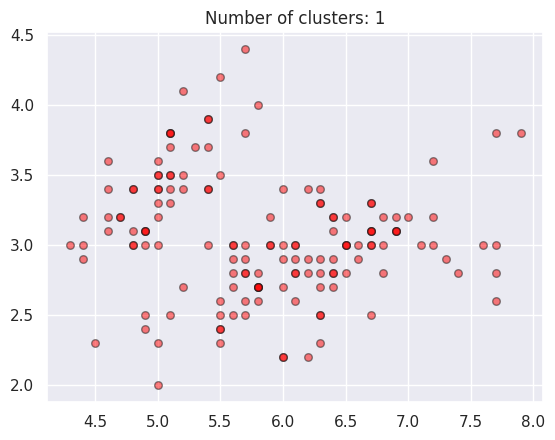

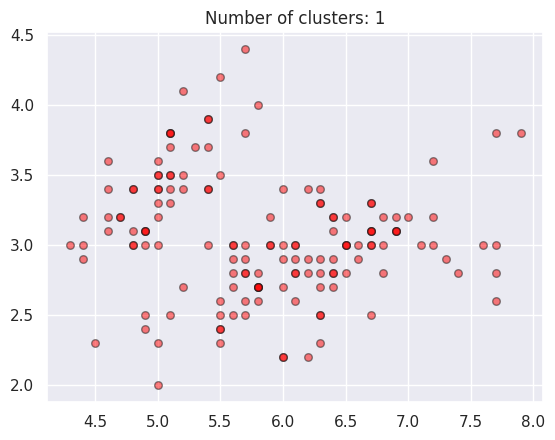

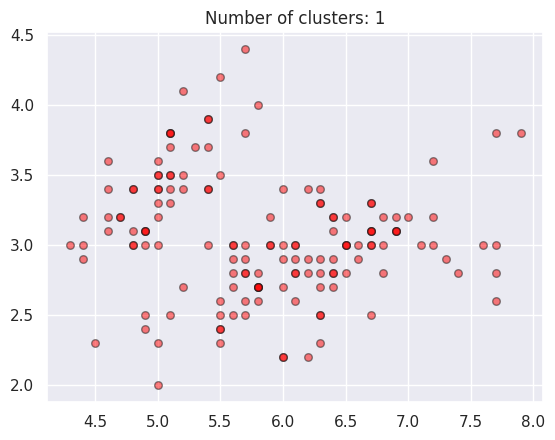

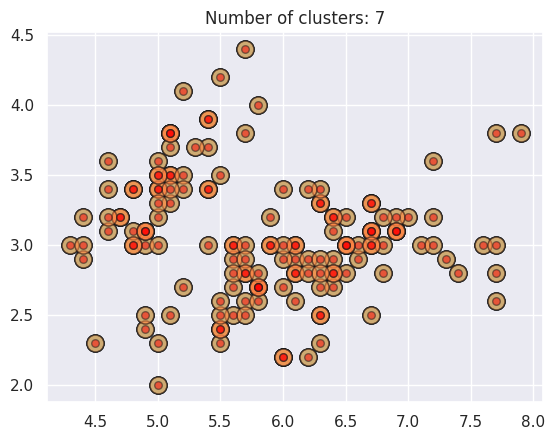

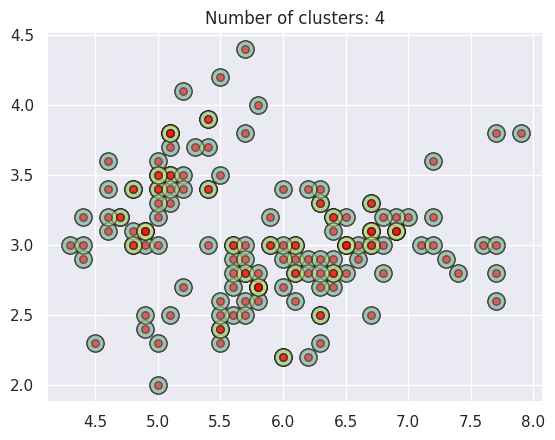

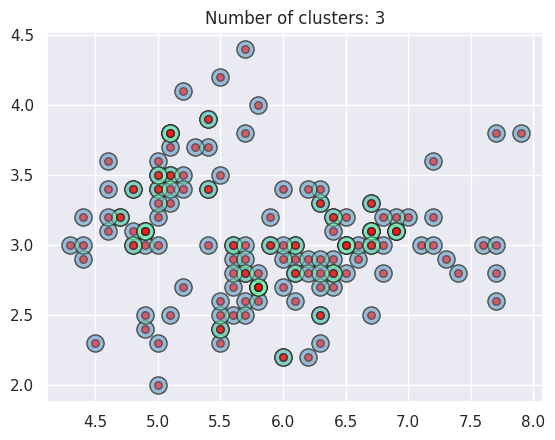

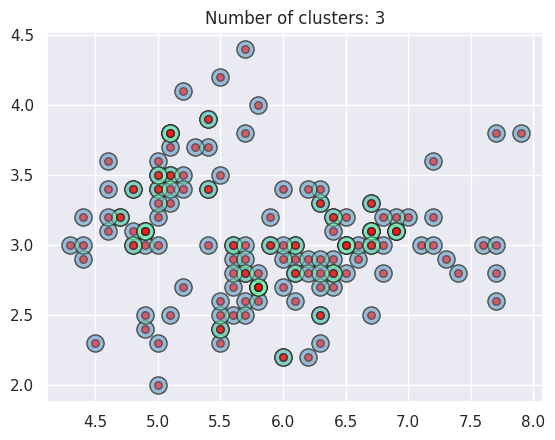

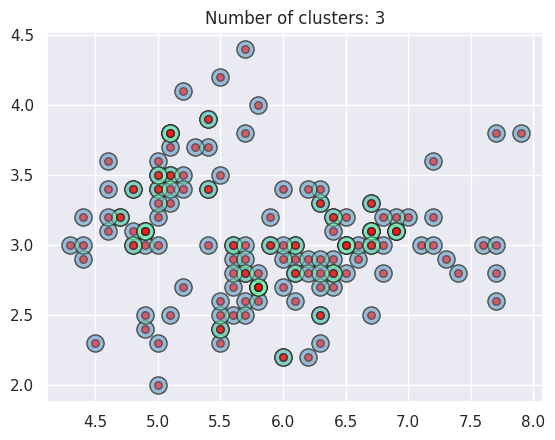

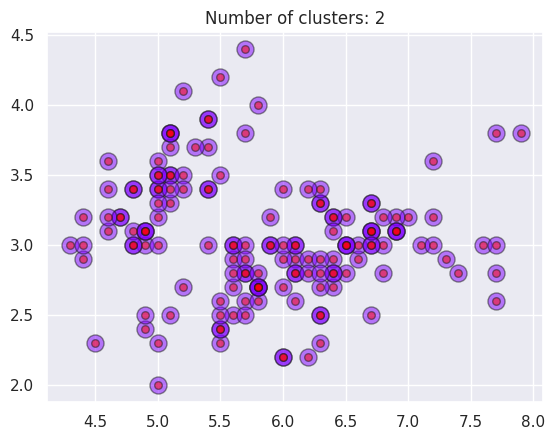

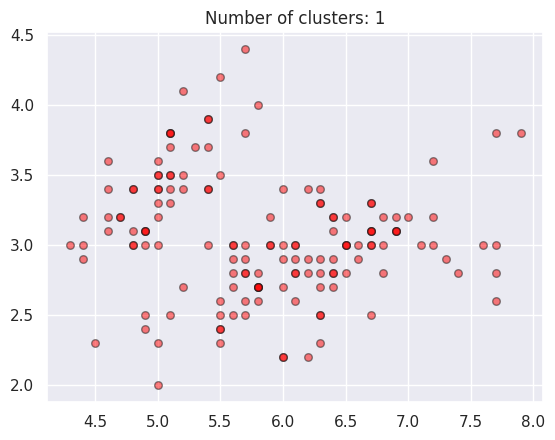

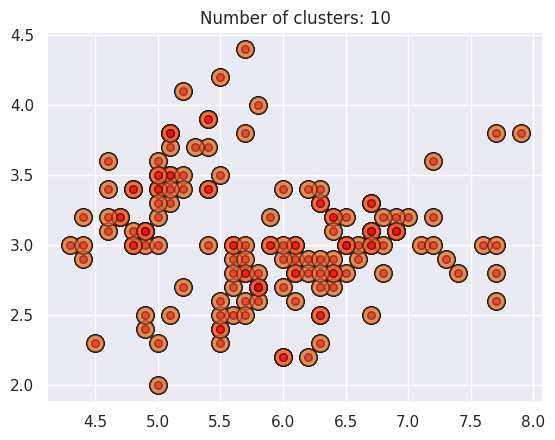

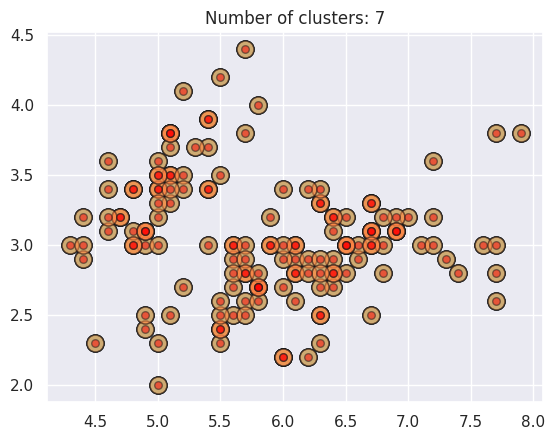

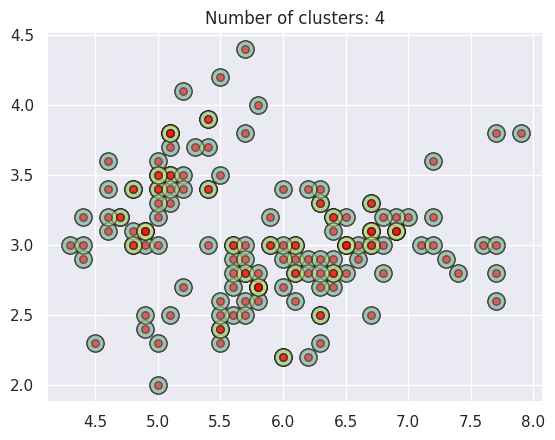

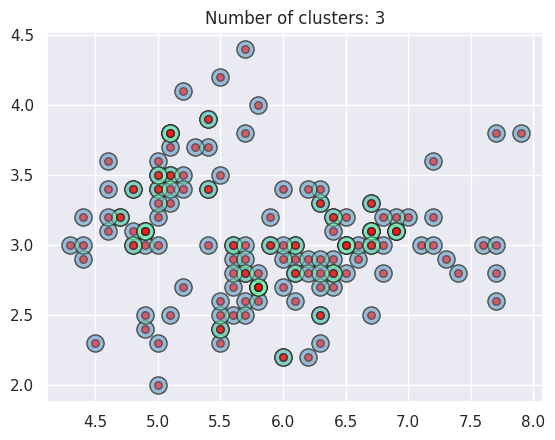

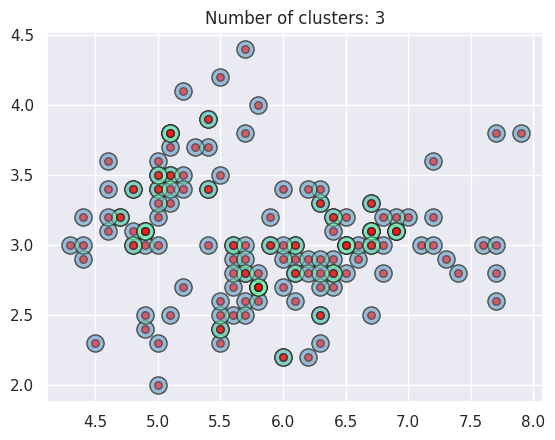

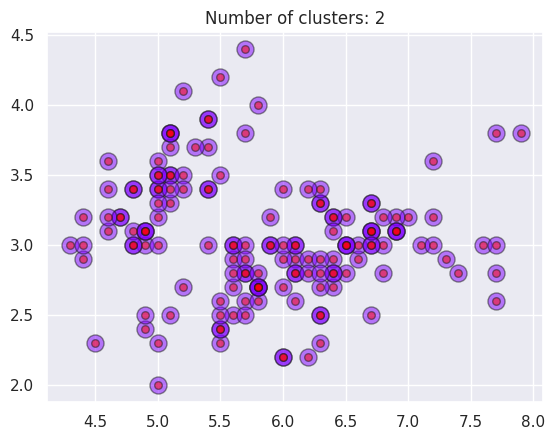

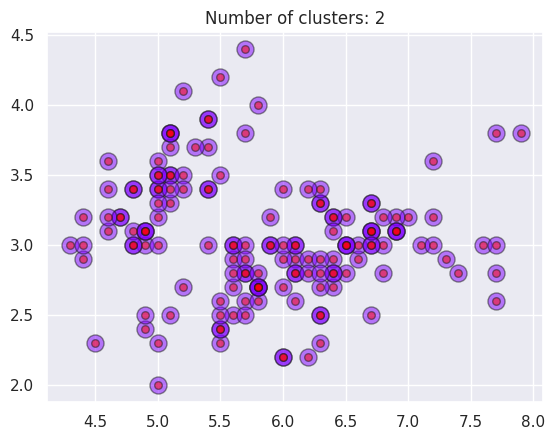

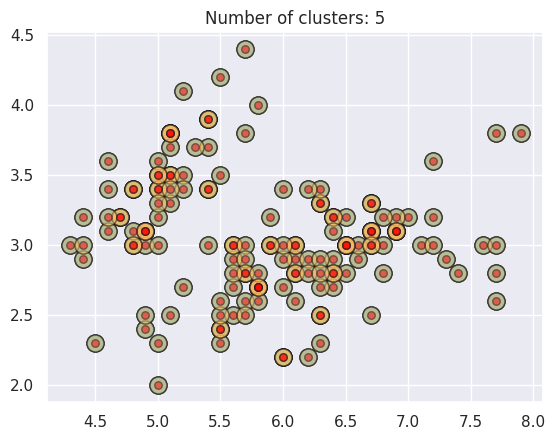

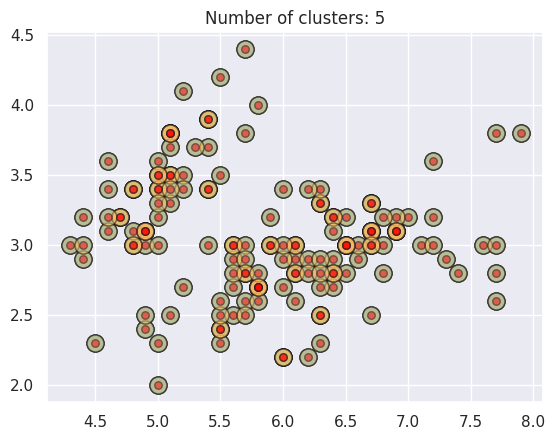

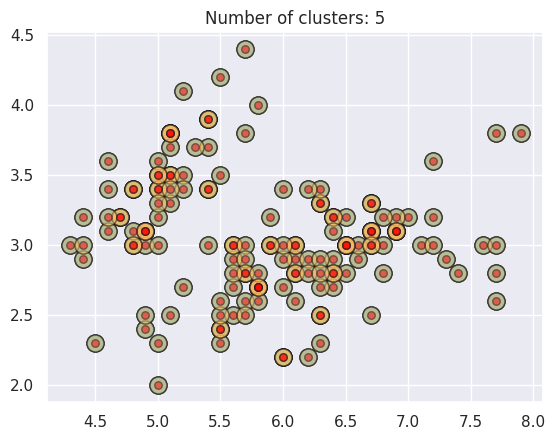

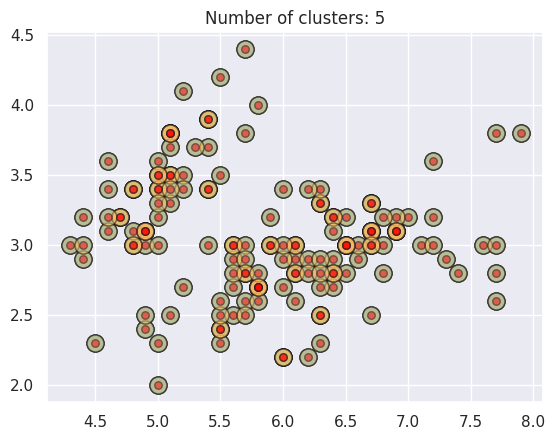

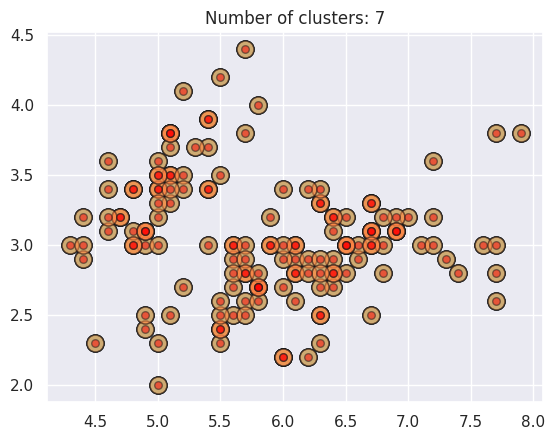

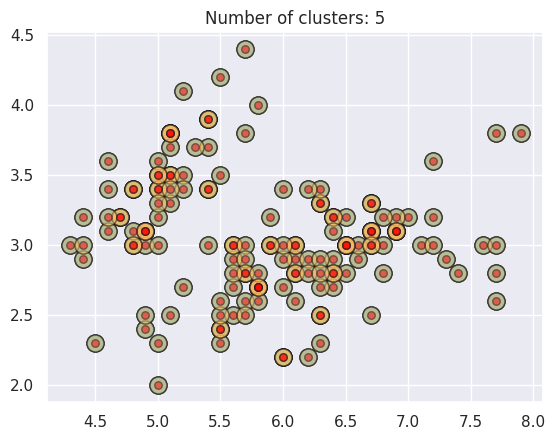

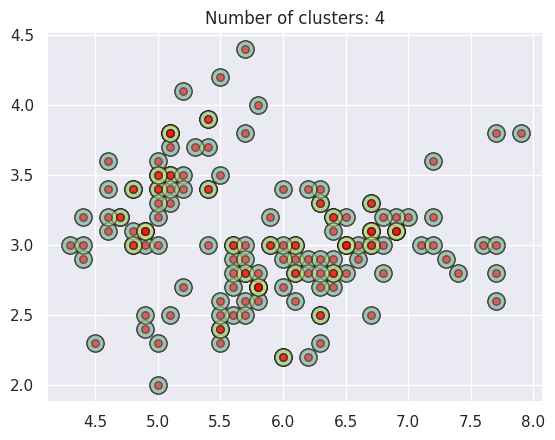

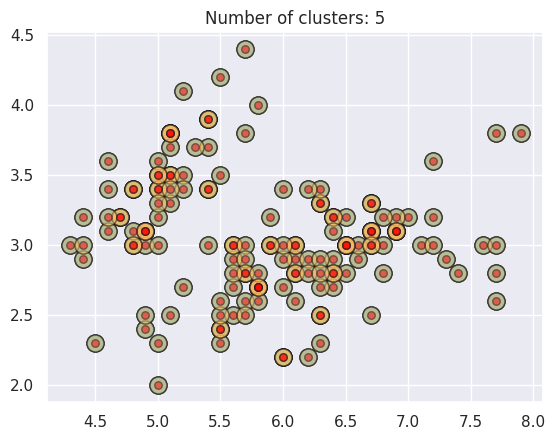

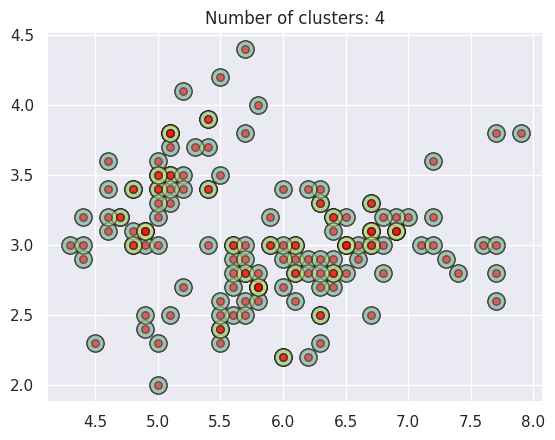

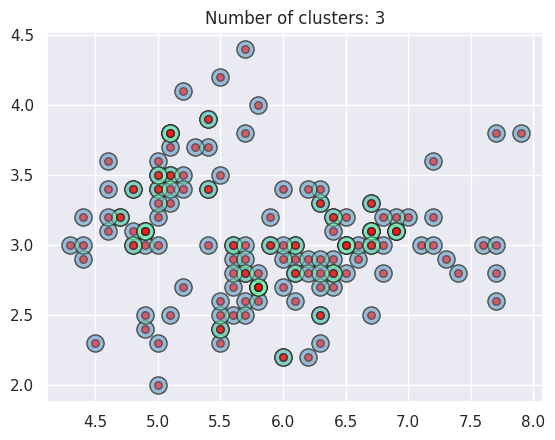

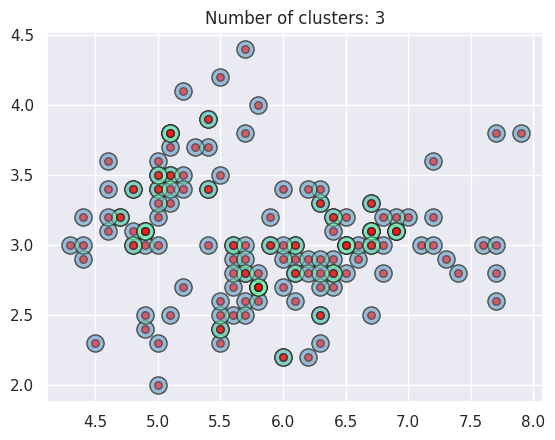

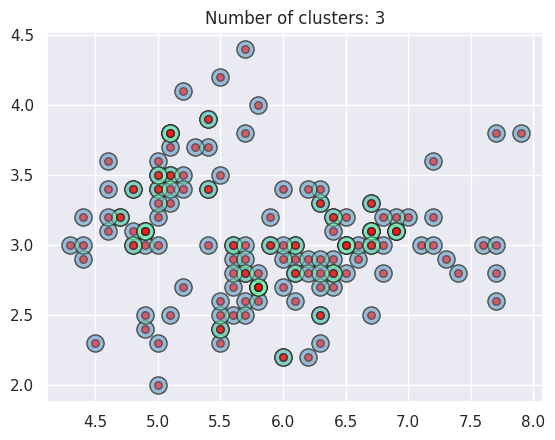

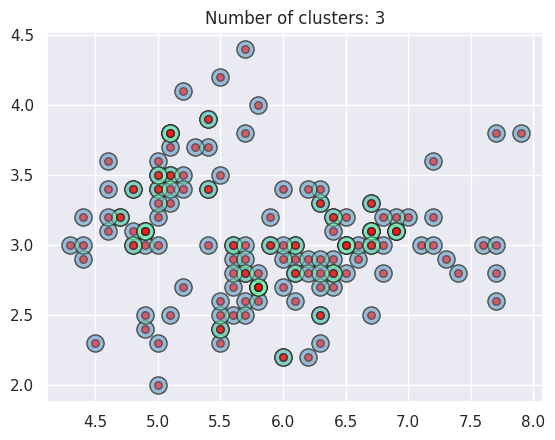

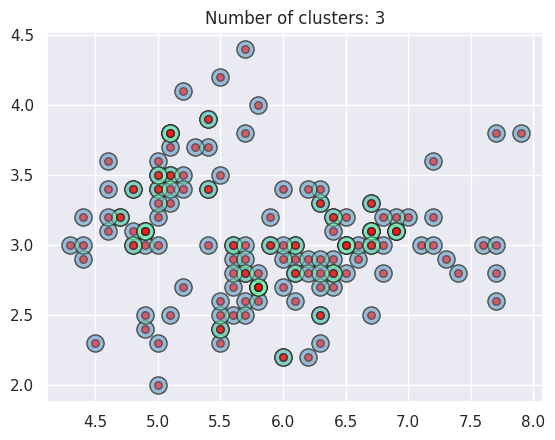

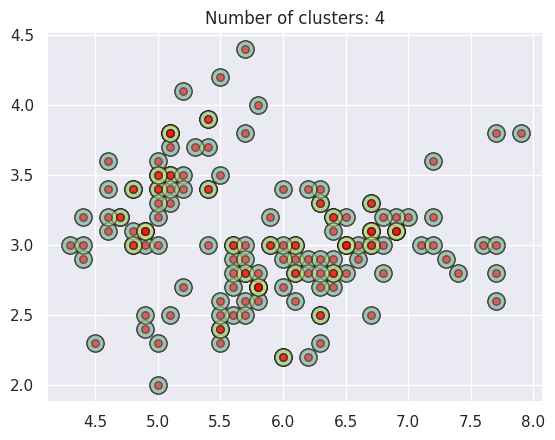

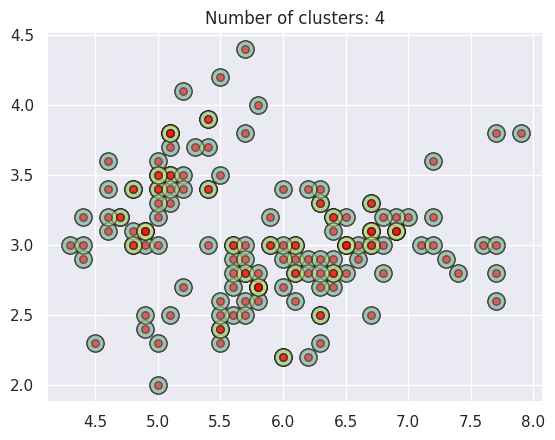

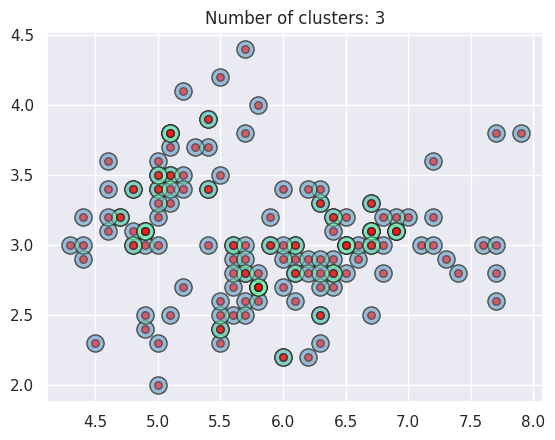

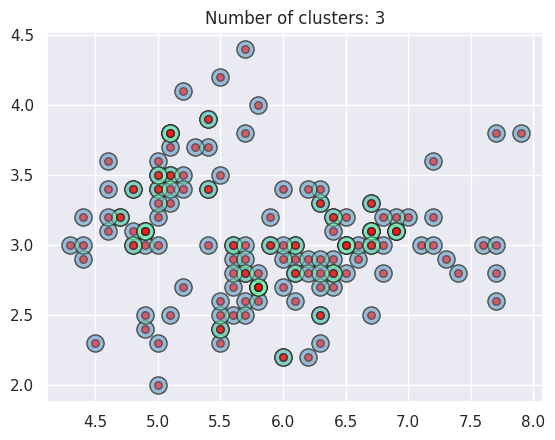

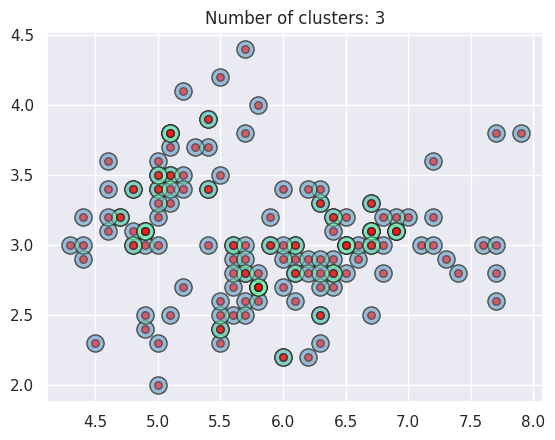

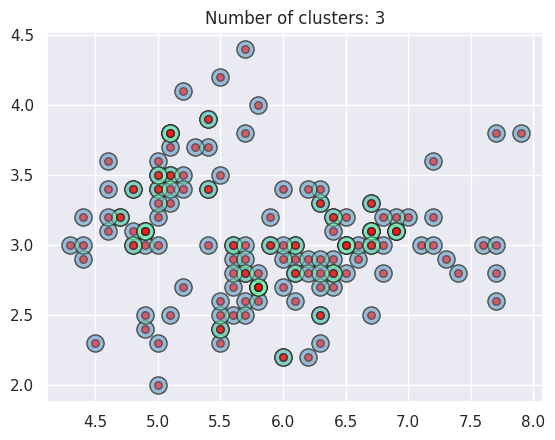

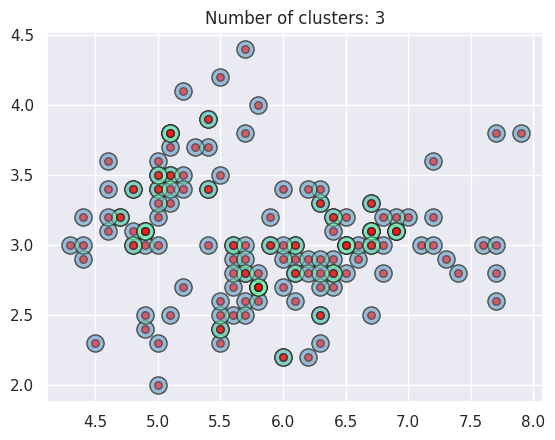

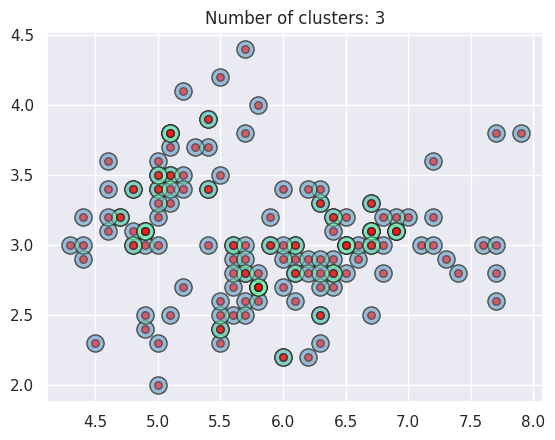

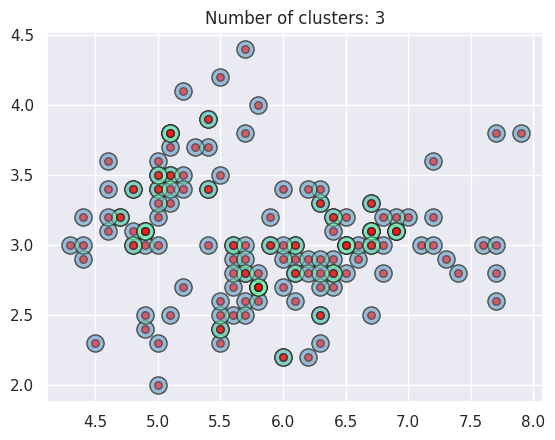

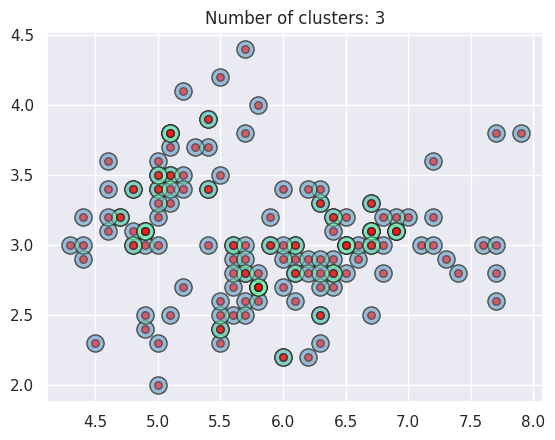

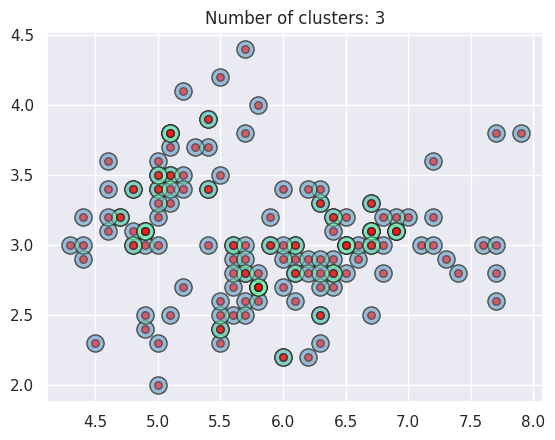

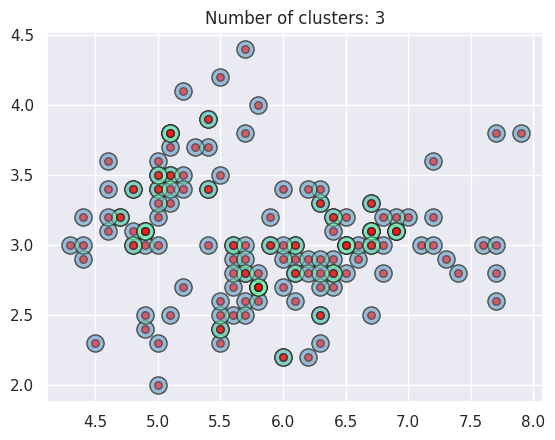

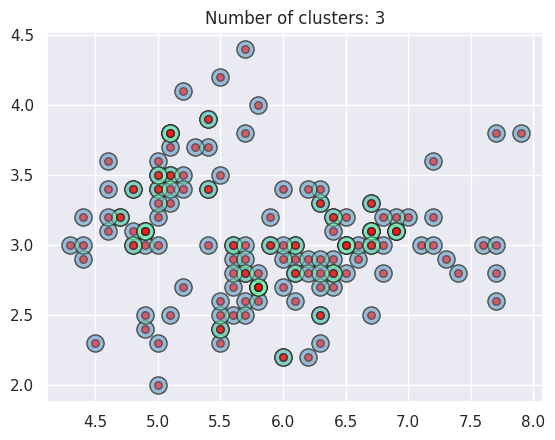

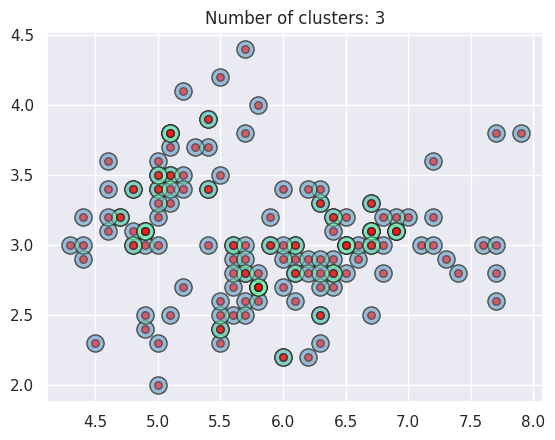

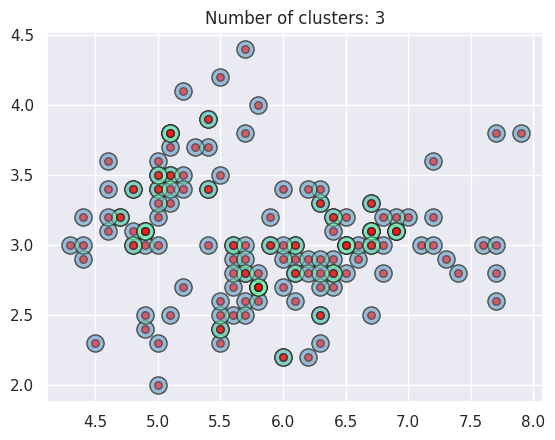

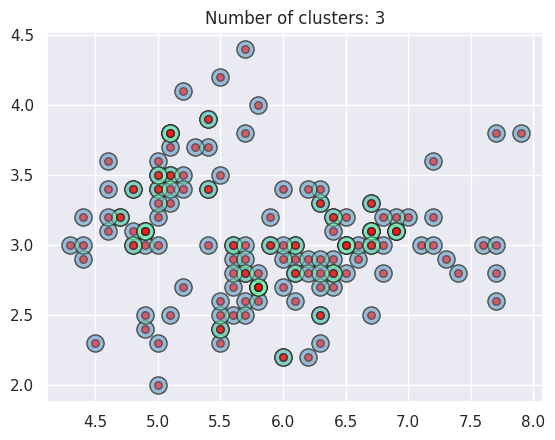

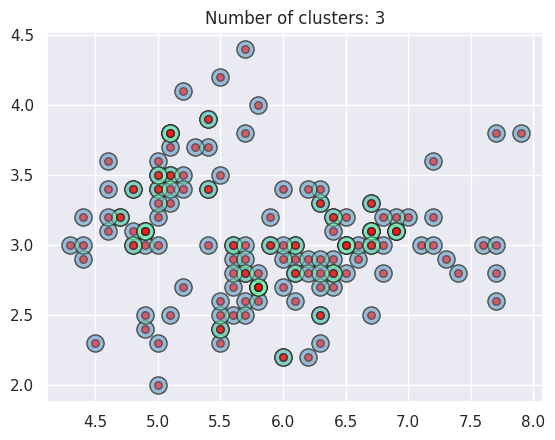

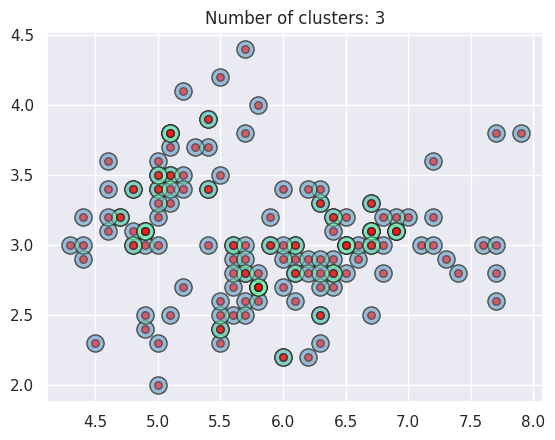

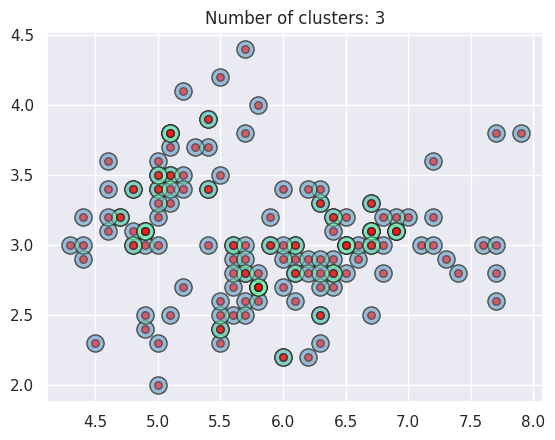

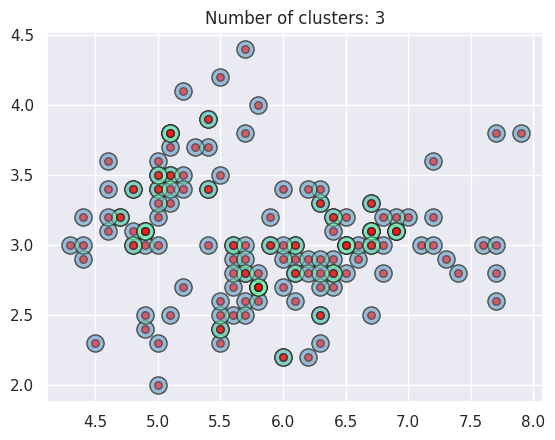

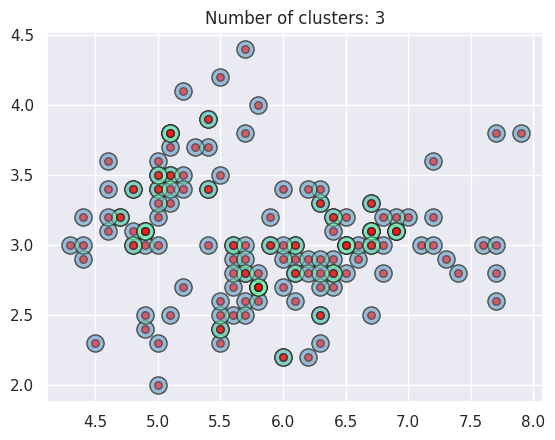

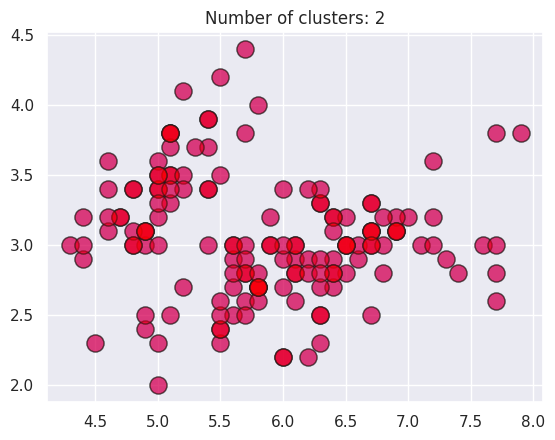

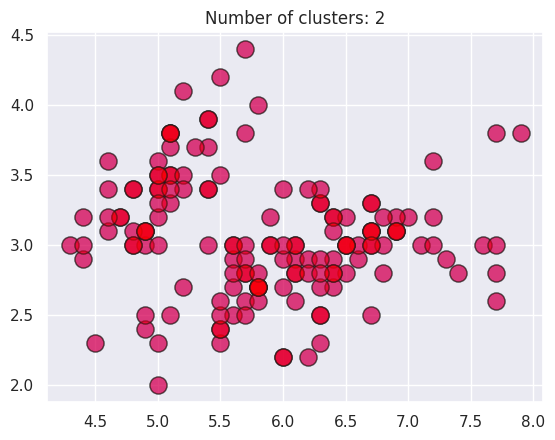

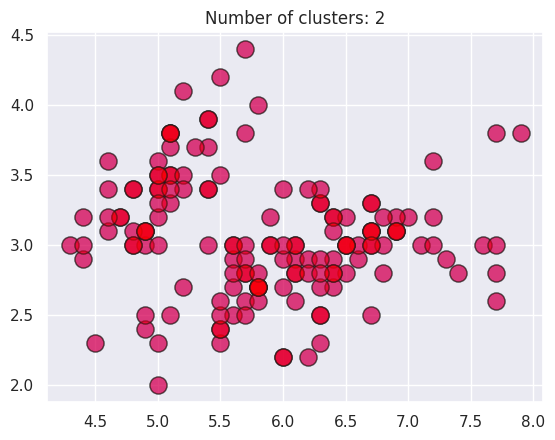

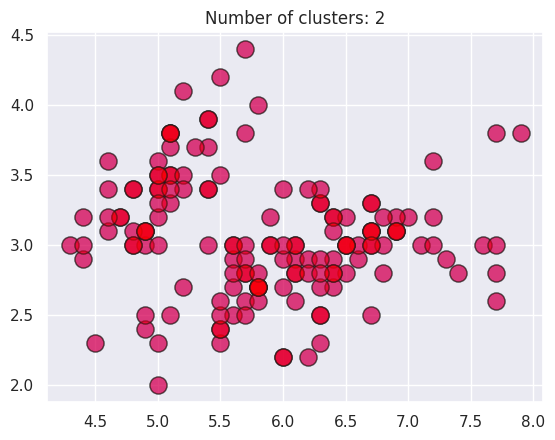

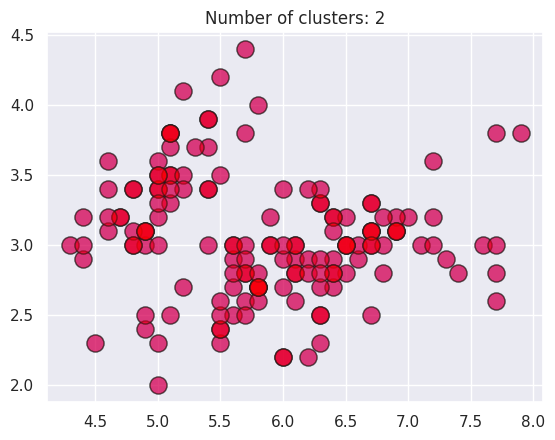

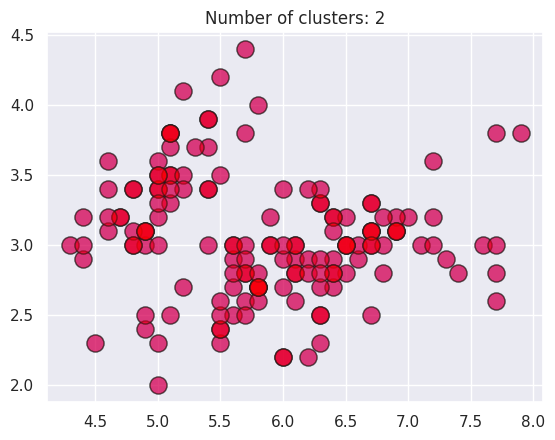

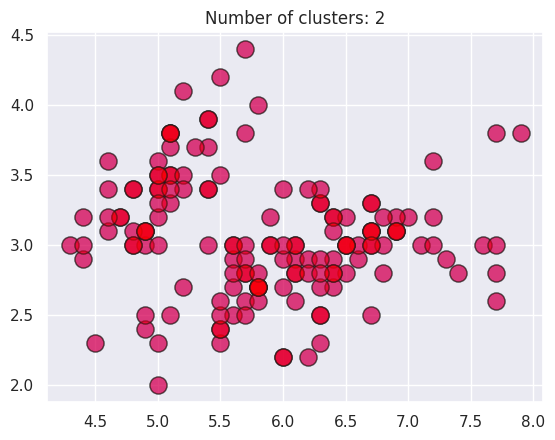

In [ ]:
dataframe.info()
dataframe.describe()
dataframe.head()
dataset = dataframe.values
data = dataset[:,0:4].astype(float)
for i in np.arange(0.1,1,0.1):
  for z in range(3,10):
    model = DBSCAN(eps=i, min_samples=z)
    model.fit(data)
    labels = model.labels_
    # print(labels)
    num_clusters = len(set(labels))
    unique_labels = set(labels)
    fig, ax = plt.subplots()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    # print(colors)
    for cluster_label, color in zip(unique_labels, colors):

        size = 150
        if cluster_label == -1:
            color = 'red'
            size = 30

        x_coords = data[:, 0]
        y_coords = data[:, 1]
        ax.scatter(x=x_coords, y=y_coords, color=color, edgecolor='k', s=size, alpha=0.5)

    ax.set_title('Number of clusters: {}'.format(num_clusters))
    plt.show()

In [ ]:
for i,z in zip(range(1,5),range(1,5)):
  print(i , z)
for i in range(1,5):
  for z in range(1,5):
    print(i , z)

1 1
2 2
3 3
4 4
1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4
